# Proyecto 5

## ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

### Análisis de los datos

Se agregan los datos y se hace una exploración del contenido para determinar si el nombre de
las columnas y los tipo de datos son correctos. También si existen valores nulos y
filas duplicadas.

In [362]:
# Import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [363]:
# Read DataFrames
calls = pd.read_csv('./megaline_calls.csv',sep=',',header=0)
internet = pd.read_csv('./megaline_internet.csv',sep=',',header=0)
messages = pd.read_csv('./megaline_messages.csv',sep=',',header=0)
plans = pd.read_csv('./megaline_plans.csv',sep=',',header=0)
users = pd.read_csv('./megaline_users.csv',sep=',',header=0)

#### DataFrame: Tarifas

In [364]:
# DataFrame information
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [365]:
# Show DataFrame
print(plans.head())

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


*Nota:* Los datos de esta tabla tienen el formato adecuado, no hay varoles nulos ni ausentes, por ahora no es necesario modificarlos.

#### DataFrame: Usuarios/as

In [366]:
# DataFrame information
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


*Nota:* La columna "churn_date" tiene valores nulos y la columna 'reg_date' no tiene formato de fecha.


Se eliminará la columna "churn_date", porque tiene valores ausentes y no será usada en este análisis.

In [367]:
# Delete coumn 'churn_date' if it has null-values
users = users.drop(labels=['churn_date'],axis='columns')
print(users.head(3))

   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   

     reg_date      plan  
0  2018-12-24  ultimate  
1  2018-08-13      surf  
2  2018-10-21      surf  


Se agregará una columna extra del mes de suscripción, se usará más adelante.

In [368]:
# Change 'reg_date' to datetime format and extract month
users['month'] = pd.to_datetime(users['reg_date'],format='%Y-%m-%d')
users['month'] = users['month'].dt.month
print(users.head(3))

   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   

     reg_date      plan  month  
0  2018-12-24  ultimate     12  
1  2018-08-13      surf      8  
2  2018-10-21      surf     10  


#### DataFrame: Llamadas

In [369]:
# DataFrame information
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [370]:
# Show DataFrame
print(calls.head())

         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22


No hay valores ausentes. Se agregara una columna del mes de las llamdas.

In [371]:
# Change 'call_date' to datetime format and extract month
calls['month'] = pd.to_datetime(calls['call_date'],format='%Y-%m-%d')
calls['month'] = calls['month'].dt.month

#### DataFrame: Mensajes

In [372]:
# DataFrame information
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [373]:
# Show DataFrame
print(messages.head(3))

         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31


No hay valores ausentes. Se agregra una columna para el mes de los mensajes.

In [374]:
# Change 'message_date' to datetime format and extract month
messages['message_date'] = pd.to_datetime(messages['message_date'],format='%Y-%m-%d')
messages['month'] = messages['message_date'].dt.month
print(messages.head(3))

         id  user_id message_date  month
0  1000_125     1000   2018-12-27     12
1  1000_160     1000   2018-12-31     12
2  1000_223     1000   2018-12-31     12


#### DataFrame: Internet

In [375]:
# DataFrame information
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [376]:
# Show DataFrame
print(internet.head(3))

         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40


No hay valores ausentes. Se agregra una columna para el mes.

In [377]:
# Change 'session_date' to datetime format and extract month
internet['session_date'] = pd.to_datetime(internet['session_date'],format='%Y-%m-%d')
internet['month'] = internet['session_date'].dt.month
print(internet.head(3))

         id  user_id session_date  mb_used  month
0   1000_13     1000   2018-12-29    89.86     12
1  1000_204     1000   2018-12-31     0.00     12
2  1000_379     1000   2018-12-28   660.40     12


## Análisis de los datos

### Agregar datos por usuario

In [378]:
# Group by 'user_id' and 'month' to count calls per user per month
calls_per_user = calls.groupby(by=['user_id','month'])['call_date'].count()
calls_per_user = calls_per_user.reset_index()
print(calls_per_user.head(3))

   user_id  month  call_date
0     1000     12         16
1     1001      8         27
2     1001      9         49


In [379]:
# Group by 'user_id' and 'month' to sum call durations per user per month
mins_per_user = calls.groupby(by=['user_id','month'])['duration'].sum()
mins_per_user = mins_per_user.reset_index()
print(mins_per_user.head(3))

   user_id  month  duration
0     1000     12    116.83
1     1001      8    171.14
2     1001      9    297.69


In [380]:
# Group by 'user_id' and 'month' to count messages per user per month
msgs_per_user = messages.groupby(by=['user_id','month'])['message_date'].count()
msgs_per_user = msgs_per_user.reset_index()
print(msgs_per_user.head(3))

   user_id  month  message_date
0     1000     12            11
1     1001      8            30
2     1001      9            44


In [381]:
# Group by 'user_id' and 'month' to count MB used per user per month
internet_per_user = internet.groupby(by=['user_id','month'])['mb_used'].sum()
internet_per_user = internet_per_user.reset_index()
print(internet_per_user.head(3))

   user_id  month   mb_used
0     1000     12   1901.47
1     1001      8   6919.15
2     1001      9  13314.82


A continuacion se combinaran los DataFrames obtenidos previamente, considerando las columnas 'user_id' y 'month'.

In [382]:
# Merge data into a single DataFrame
full_user = calls_per_user.merge(mins_per_user,on=['user_id','month'],how='left')

In [383]:
# Merge data into a single DataFrame
full_user = full_user.merge(msgs_per_user,on=['user_id','month'],how='left')

In [384]:
# Merge data into a single DataFrame
full_user = full_user.merge(internet_per_user,on=['user_id','month'],how='left')
print(full_user.head(3))

   user_id  month  call_date  duration  message_date   mb_used
0     1000     12         16    116.83          11.0   1901.47
1     1001      8         27    171.14          30.0   6919.15
2     1001      9         49    297.69          44.0  13314.82


Al unir los dataFrames puede que algunos campos fueron llenados con NaN, esto se debe a que tal vez no había información para 'mb_used' en el mes 7, por ejemplo, entonces esa celda se llenó con NaN. Se llenarán tales celdas con 0.

In [385]:
# Fill null values with 0
full_user = full_user.fillna(0)

# Show total null values per column
print(full_user.isna().sum())

user_id         0
month           0
call_date       0
duration        0
message_date    0
mb_used         0
dtype: int64


Ahora se agregarán los datos de las tarifas de los planes.

In [386]:
# Extrac some columns and rename them
user_plan = users[['user_id','plan','city']]
user_plan.columns = ['user_id','plan_name','city']

# Merge user data with plans
full_user = full_user.merge(user_plan,on='user_id',how='left')
print(full_user.head(3))

   user_id  month  call_date  duration  message_date   mb_used plan_name  \
0     1000     12         16    116.83          11.0   1901.47  ultimate   
1     1001      8         27    171.14          30.0   6919.15      surf   
2     1001      9         49    297.69          44.0  13314.82      surf   

                                    city  
0  Atlanta-Sandy Springs-Roswell, GA MSA  
1        Seattle-Tacoma-Bellevue, WA MSA  
2        Seattle-Tacoma-Bellevue, WA MSA  


In [387]:
# Merge with plans DataFrame
df_clean = full_user.merge(plans,on='plan_name',how='left')
print(df_clean.head(3))

   user_id  month  call_date  duration  message_date   mb_used plan_name  \
0     1000     12         16    116.83          11.0   1901.47  ultimate   
1     1001      8         27    171.14          30.0   6919.15      surf   
2     1001      9         49    297.69          44.0  13314.82      surf   

                                    city  messages_included  \
0  Atlanta-Sandy Springs-Roswell, GA MSA               1000   
1        Seattle-Tacoma-Bellevue, WA MSA                 50   
2        Seattle-Tacoma-Bellevue, WA MSA                 50   

   mb_per_month_included  minutes_included  usd_monthly_pay  usd_per_gb  \
0                  30720              3000               70           7   
1                  15360               500               20          10   
2                  15360               500               20          10   

   usd_per_message  usd_per_minute  
0             0.01            0.01  
1             0.03            0.03  
2             0.03            

In [388]:
# Obtain monthly income per user
def income_monthly(row):
    m = row['duration'] - row['minutes_included']
    m = m*row['usd_per_minute']
    if m<0:
        m = 0
    
    msg = row['message_date'] - row['messages_included']
    msg = msg*row['usd_per_message']
    if msg<0:
        msg = 0
    
    gbs = row['mb_used'] - row['mb_per_month_included']
    gbs = gbs*row['usd_per_gb']
    if gbs<0:
        gbs = 0
    
    total = row['usd_monthly_pay'] + m + msg + gbs
    return total

In [389]:
# Obain total payment
df_clean['total_pay'] = df_clean.apply(income_monthly, axis=1)
df_clean.head(3)

,user_id,month,call_date,duration,message_date,mb_used,plan_name,city,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,total_pay
0,1000,12,16,116.83,11.0,1901.47,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,30720,3000,70,7,0.01,0.01,70.0
1,1001,8,27,171.14,30.0,6919.15,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,20.0
2,1001,9,49,297.69,44.0,13314.82,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,20.0


## Estudia el comportamiento de usuario

#### Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

In [390]:
# Filter and group by month and plan name to calculate average duration
df_month_ultimate = df_clean[df_clean['plan_name'] == 'ultimate'][['month','duration']]
df_month_ultimate = df_month_ultimate.groupby(by='month')['duration'].mean()

df_month_surf = df_clean[df_clean['plan_name'] == 'surf'][['month','duration']]
df_month_surf = df_month_surf.groupby(by='month')['duration'].mean()

In [391]:
# Concatenate the two DataFrames for ultimate and surf plans
df_plans = pd.concat([df_month_ultimate,df_month_surf],axis='columns')

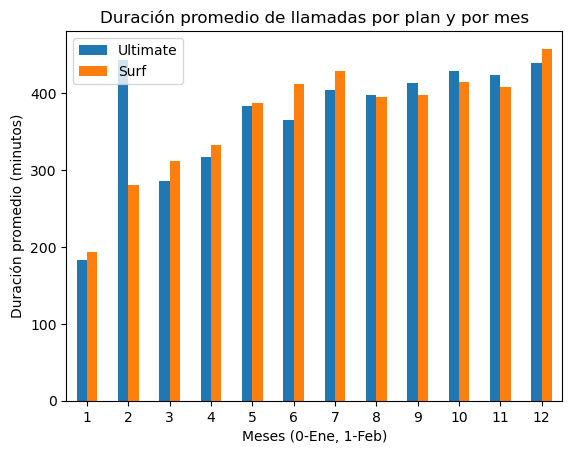

In [392]:
# Bar plot
df_plans.plot(kind='bar',title='Duración promedio de llamadas por plan y por mes')
plt.xlabel('Meses (0-Ene, 1-Feb)')
plt.ylabel('Duración promedio (minutos)')
plt.legend(['Ultimate','Surf'])
plt.xticks(rotation=0)
plt.show()

#### Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

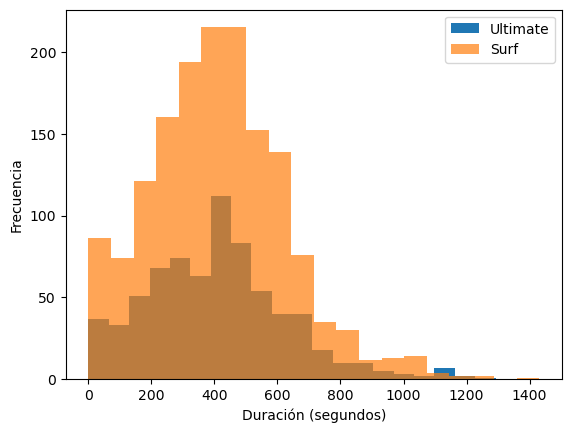

In [393]:
# Filter DataFrame by plan
min_ultimate = df_clean[df_clean['plan_name'] == 'ultimate']['duration']
min_ultimate.plot(kind='hist',bins=20)

min_surf = df_clean[df_clean['plan_name'] == 'surf']['duration']
min_surf.plot(kind='hist',bins=20,alpha=0.7)
plt.legend(['Ultimate','Surf'])
plt.xlabel('Duración (segundos)')
plt.ylabel('Frecuencia')
plt.show()

#### Calcula la media y la varianza de la duración mensual de llamadas.

In [394]:
# Concatenate dataFrames
df_duration_call = pd.concat([min_ultimate,min_surf],axis='columns')
df_duration_call.columns = ['ultimate','surf']

# Show DataFrame statistics metrics
df_duration_call.describe()

,ultimate,surf
count,713.000000,1545.000000
mean,410.180954,412.097890
std,224.745705,216.797727
min,0.000000,0.000000
25%,247.970000,262.780000
50%,399.980000,405.710000
75%,534.820000,546.230000
max,1292.090000,1431.220000


#### Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

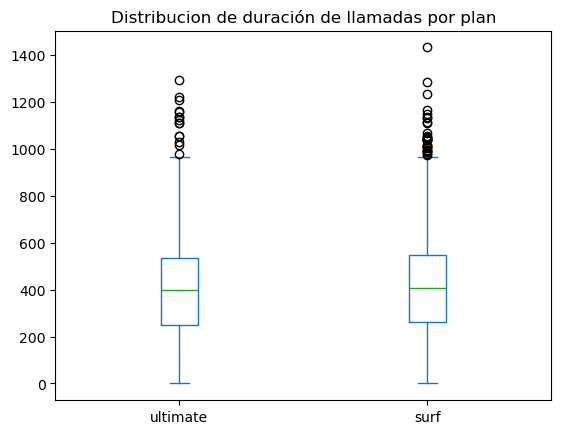

In [395]:
# Box plot
df_duration_call.plot(kind='box')
plt.title('Distribucion de duración de llamadas por plan')
plt.show()

**Conclusiones:**
Para el plan "ultimate" se tiene: mean=410.180 y std=224.745, para el plan "surf" se tiene: mean=412.097 y std=216.797. Dado que la media de ambos planes es casi igual y la desviacion estandar tambien, se concluye que no hay variacion significativa en el comportamiento de los usuarios respecto al tiempo que usan en llamadas.

#### Mensajes

Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

In [396]:
# Filter DataFrame for each plan and calculate average monthly messages
msg_ultimate = df_clean[df_clean['plan_name'] == 'ultimate'][['month','message_date']]
msg_ultimate = msg_ultimate.groupby(by='month')['message_date'].mean()

msg_surf = df_clean[df_clean['plan_name'] == 'surf'][['month','message_date']]
msg_surf = msg_surf.groupby(by='month')['message_date'].mean()

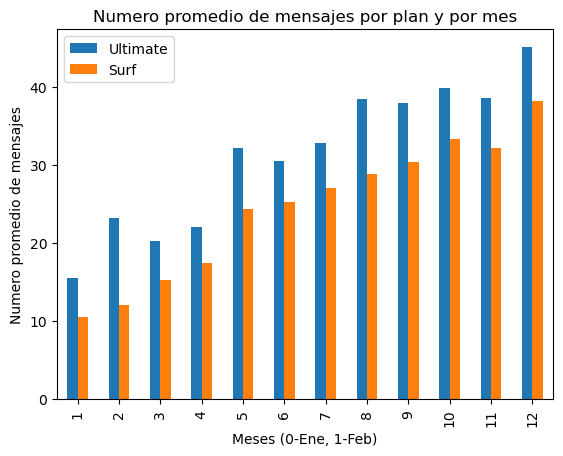

In [397]:
# Concatenate the two DataFrames for ultimate and surf plans
msg_plans = pd.concat([msg_ultimate,msg_surf],axis='columns')
msg_plans.columns = ['ultimate','surf']

# Bar plot
msg_plans.plot(kind='bar',title='Numero promedio de mensajes por plan y por mes')
plt.xlabel('Meses (0-Ene, 1-Feb)')
plt.ylabel('Numero promedio de mensajes')
plt.legend(['Ultimate','Surf'])
plt.show()

Compara el número de mensajes mensuales que necesitan los usuarios de cada plan. Traza un grafico de densidad.

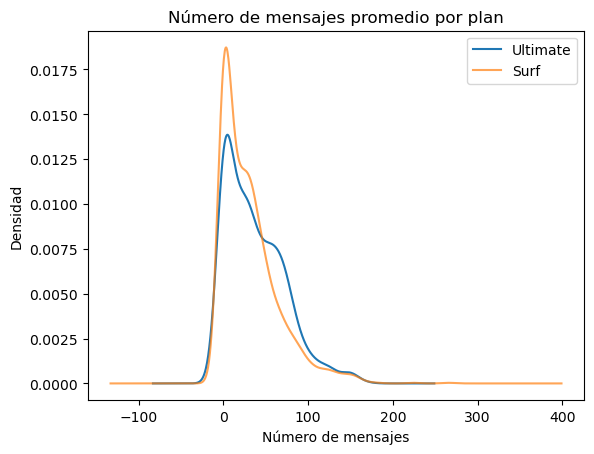

In [398]:
# Filter DataFrame by plan and extract message dates
msg_ultimate = df_clean[df_clean['plan_name'] == 'ultimate']['message_date']

# Density plot for messages
msg_ultimate.plot(kind='density',title='Número de mensajes promedio por plan')
msg_surf = df_clean[df_clean['plan_name'] == 'surf']['message_date']

# Density plot
msg_surf.plot(kind='density', alpha=0.7)
plt.legend(['Ultimate','Surf'])
plt.xlabel('Número de mensajes')
plt.ylabel('Densidad')
plt.show()

In [399]:
# Show DataFrame descriptive statistics
msg_plans.describe()

,ultimate,surf
count,12.000000,12.000000
mean,31.356034,24.556757
std,9.231372,8.900332
min,15.500000,10.500000
25%,22.886905,16.865217
50%,32.466978,26.153125
75%,38.503996,30.811603
max,45.087248,38.212219


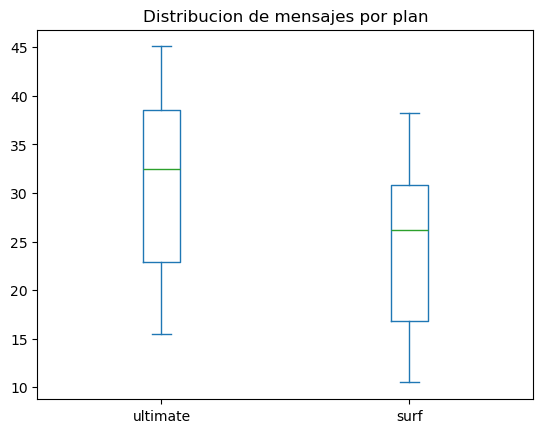

In [400]:
# Box plot
msg_plans.plot(kind='box')
plt.title('Distribucion de mensajes por plan')
plt.show()

**Conclusiones:** De manera general sí hay variaciones en el comportamiento de los usuarios respecto al numero de mensajes enviados al mes. Para el plan "ultimate" se tiene: mean=31 y std=9, para el plan "surf" se tiene: mean=24.5 y std=8.9. Los mensajes enviados con el plan ultimate son 12.8% más que con el plan surf (31.35 / 245 = 1.128). Se concluye que sí hay variación significativa en el comportamiento de los usuarios respecto al numero de mensajes enviados.

#### Internet

Compara los Mbs promedio usados por cada plan y por cada mes.

In [401]:
# Filter DataFrame for each plan and calculate average monthly MB used
internet_ultimate = df_clean[df_clean['plan_name'] == 'ultimate'][['month','mb_used']]
internet_ultimate = internet_ultimate.groupby(by='month')['mb_used'].mean()

internet_surf = df_clean[df_clean['plan_name'] == 'surf'][['month','mb_used']]
internet_surf = internet_surf.groupby(by='month')['mb_used'].mean()

# Concatenate the two DataFrames for ultimate and surf plans
df_internet = pd.concat([internet_ultimate,internet_surf],axis='columns')

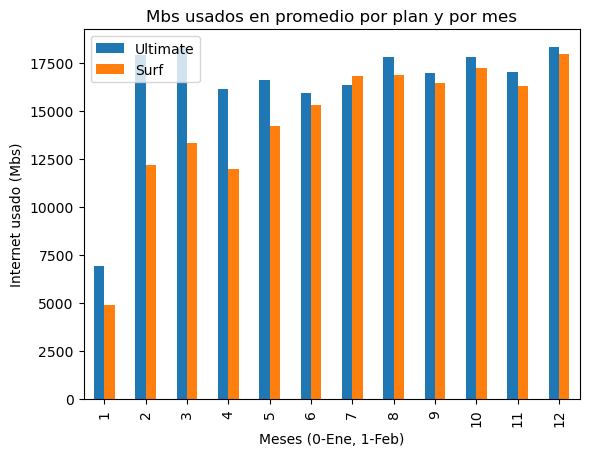

In [402]:
# Bar plot
df_internet.plot(kind='bar',title='Mbs usados en promedio por plan y por mes')
plt.xlabel('Meses (0-Ene, 1-Feb)')
plt.ylabel('Internet usado (Mbs)')
plt.legend(['Ultimate','Surf'])
plt.show()

Compara el número de Mbs usados de cada plan. Traza un grafico de densidad.

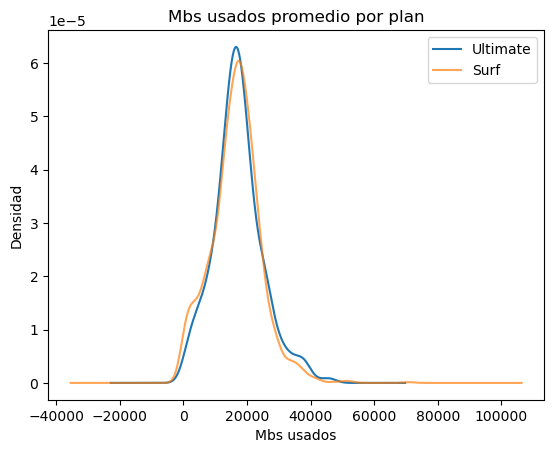

In [403]:
# Filter DataFrame
mb_ultimate = df_clean[df_clean['plan_name'] == 'ultimate']['mb_used']
mb_surf = df_clean[df_clean['plan_name'] == 'surf']['mb_used']

# Density plot
mb_ultimate.plot(kind='density',title='Mbs usados promedio por plan')
mb_surf.plot(kind='density', alpha=0.7)
plt.legend(['Ultimate','Surf'])
plt.xlabel('Mbs usados')
plt.ylabel('Densidad')
plt.show()

Calcula la media y la varianza de los Mbs usados.

In [404]:
# Concatenate dataFrames
df_mbs = pd.concat([mb_ultimate,mb_surf],axis='columns')
df_mbs.columns = ['ultimate','surf']
df_mbs.describe()

,ultimate,surf
count,713.000000,1545.000000
mean,17278.003731,16505.727372
std,7759.655167,7847.816242
min,290.060000,0.000000
25%,12707.180000,11986.520000
50%,16866.450000,16832.090000
75%,21003.900000,20970.260000
max,46595.330000,70931.590000


**Conclusiones:** Para el plan "ultimate" se tiene: mean=17278 y std=7759.6, para el plan "surf" se tiene: mean=16505.7 y std=7847.8. La media de ambos planes es casi igual y la desviación estandar también, pero el gráfico de barras y el de densidad muestran una variación en la distribución de los Mbs usados, por lo tanto, se concluye que sí hay una ligera variación en el comportamiento de los usuarios respecto a los Mbs usados.

#### Ingreso

Compara el pago promedio por cada plan y por cada mes.

In [405]:
# Filter DataFrame for each plan and calculate average monthly payment
df_income_ultimate = df_clean[df_clean['plan_name'] == 'ultimate'][['month','total_pay']]
df_income_ultimate = df_income_ultimate.groupby(by='month')['total_pay'].mean()

df_income_surf = df_clean[df_clean['plan_name'] == 'surf'][['month','total_pay']]
df_income_surf = df_income_surf.groupby(by='month')['total_pay'].mean()

In [406]:
# Concatenate the two DataFrames for ultimate and surf plans
df_payments = pd.concat([df_income_ultimate,df_income_surf],axis='columns')
df_payments.columns = ['ultimate','surf']

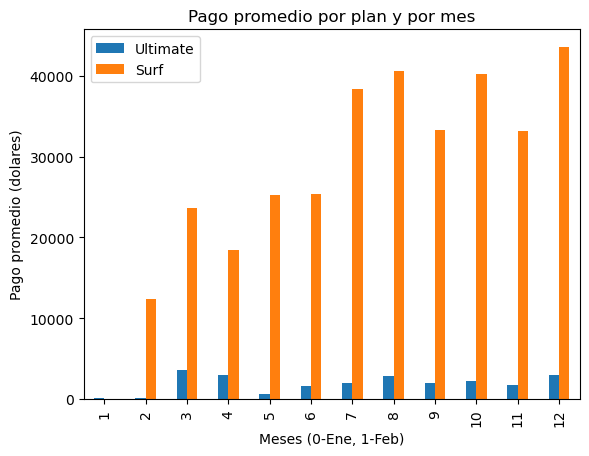

In [407]:
# Bar plot
df_payments.plot(kind='bar',title='Pago promedio por plan y por mes')
plt.xlabel('Meses (0-Ene, 1-Feb)')
plt.ylabel('Pago promedio (dolares)')
plt.legend(['Ultimate','Surf'])
plt.show()

Compara el pago mensual de cada plan. Traza un grafico de densidad.

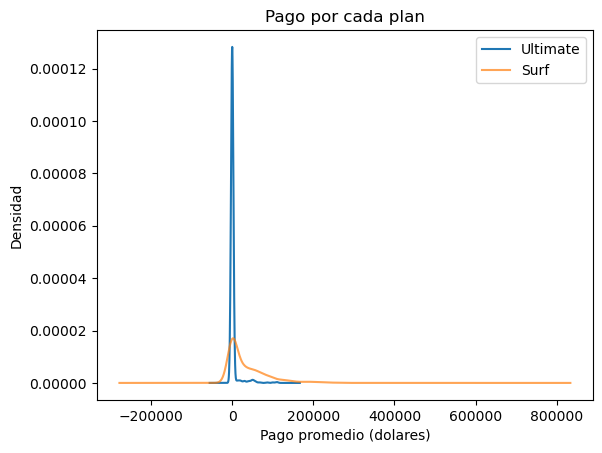

In [408]:
# Filter DataFrame
pay_ultimate = df_clean[df_clean['plan_name'] == 'ultimate']['total_pay']
pay_surf = df_clean[df_clean['plan_name'] == 'surf']['total_pay']

pay_ultimate.plot(kind='density',title='Pago por cada plan')
pay_surf.plot(kind='density', alpha=0.7)
plt.legend(['Ultimate','Surf'])
plt.xlabel('Pago promedio (dolares)')
plt.ylabel('Densidad')
plt.show()

Traza un diagrama de caja para visualizar la distribución de los ingresos por plan.

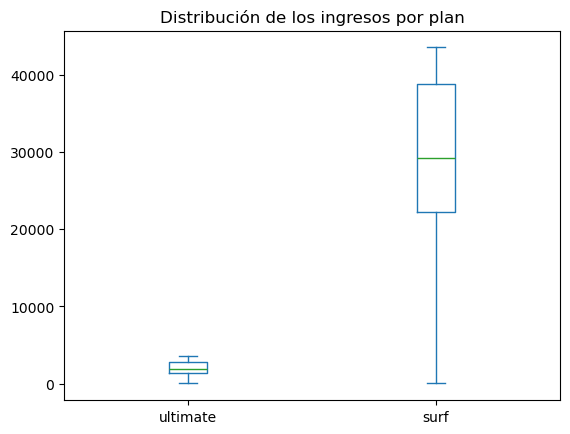

In [409]:
# Box plot
df_payments.plot(kind='box')
plt.title('Distribución de los ingresos por plan')
plt.show()

In [410]:
# Show DataFrame descriptive statistics
df_payments.describe()

,ultimate,surf
count,12.000000,12.000000
mean,1870.650971,27853.393137
std,1137.985678,13026.733304
min,70.000000,20.000000
25%,1386.759057,22277.421979
50%,1945.314534,29290.159362
75%,2837.791197,38872.628340
max,3543.866667,43556.259243


**Conclusiones:** Para el plan "ultimate" se tiene: mean=1870.6 y std=1137.9, para el plan "surf" se tiene: mean=27853.3 y std=13026.7. Dado que la media del plan surf es mucho mayor al plan ultimate y la desviación estandar tambien, se concluye que el plan surf genera ganacias significativamente mayores.

### Prueba de hipótesis estadísticas

La prueba T se usa para determinar si los promedios de 2 muestras son iguales, independientemente si las muestras tienen distribución normal o no. En este análisis se usará la prueba de Levene para complementar la prueba T y se usará un umbral de significación alpha = 5% para ambas pruebas. 

In [411]:
# Import libraries for statistical tests
from scipy import stats as st

#Umbral alpha for all tests
alpha = 0.05

**Prueba 1.**

Hipotesis nula (H0): Ganacias del plan ultimate <= Ganacias del plan surf.

Hipotesis alternativa (H1): Ganacias del plan ultimate > Ganacias del plan surf.

In [412]:
#Extarct samples
pay_ultimate = df_clean[df_clean['plan_name'] == 'ultimate']['total_pay']
pay_surf = df_clean[df_clean['plan_name'] == 'surf']['total_pay']

In [413]:
# Verify equal variances (Levene test)
levene = st.levene(pay_ultimate, pay_surf)
print("Levene test p-value:", levene.pvalue)
print("Variances are different" if levene.pvalue < alpha else "Variances are the same")

# Show samples variances (optional)
print(f"Ultimate sample variance: {np.var(pay_ultimate):.3f}")
print(f"Surf sample variance: {np.var(pay_surf):.3f}")


Levene test p-value: 1.612466410385558e-76
Variances are different
Ultimate sample variance: 120350480.867
Surf sample variance: 2722038036.185


In [414]:
# T-test, variances are different, then 'equal_var=False'
ttest = st.ttest_ind(pay_ultimate, pay_surf, alternative="greater", equal_var=False)
print("T-test p-value:", ttest.pvalue)

# Conclusion of T-test
print("H0 is rejected" if ttest.pvalue < alpha else "H0 cannot be rejected")

T-test p-value: 1.0
H0 cannot be rejected


**Conclusión:** La hipótesis nula (H0) no puede ser rechazada.

**Prueba 2.**

Hipotesis nula (H0): Ganacias promedio del area NY <= Ganacias promedio del area No_NY.

Hipotesis alternativa (H1): Ganacias promedio del area NY > Ganacias promedio del area No_NY.

In [415]:
#Extarct samples
pay_ny = df_clean[df_clean['city'].str.contains('NY-NJ')]['total_pay']
pay_no_ny = df_clean[~df_clean['city'].str.contains('NY-NJ')]['total_pay']

In [416]:
# Verify equal variances (Levene test)
levene = st.levene(pay_ny, pay_no_ny)
print("Levene test p-value:", levene.pvalue)
print("Variances are different" if levene.pvalue < alpha else "Variances are the same")

# Show samples variances (optional)
print(f"NewYork sample variance: {np.var(pay_ny):.3f}")
print(f"No NewYork sample variance: {np.var(pay_no_ny):.3f}")

Levene test p-value: 0.40600817005906387
Variances are the same
NewYork sample variance: 1765773732.068
No NewYork sample variance: 2219110617.310


In [417]:
# T-test, variances are the same, then 'equal_var=True'
ttest = st.ttest_ind(pay_ny, pay_no_ny, alternative="greater", equal_var=True)
print("T-test p-value:", ttest.pvalue)

# Conclusion of T-test
print("H0 is rejected" if ttest.pvalue < alpha else "H0 cannot be rejected")

T-test p-value: 0.20397983674516063
H0 cannot be rejected


## Conclusión general

Analizando servicio por servicio, ademas de usar las conlusiones y graficos previos, se observa que en general el comportamiento de los ususarios de cada plan si es significativamente diferente. Luego, al calcular el ingreso promedio mensual, se observa que el ingreso generado por el plan surf es mucho mayor al ingreso del plan ultimate. Finalmente, al hacer la prueba de hipotesis, se determino que nuestra suposicion que "el ingreso generado por el plan surf es mucho mayor al ingreso del plan ultimate" es probablemente cierta. De tal manera se concluye que "el ingreso generado por el plan surf es mucho mayor al ingreso del plan ultimate".